# som with scikit-learn manner
sksom is scikit-learn api for SimpleSOM. This class has method below  
* fit
* predict
* predict_proba

and attributes labels\_ too.

In [1]:
%matplotlib inline
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.
/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#/home/admin/github/wordroid.sblo.jp/lib
import os, sys
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib')
from som import som

In [3]:
import random

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
iris = datasets.load_iris()
print(dir(iris))
X = iris.data
print(iris.target_names)
X_sc = preprocessing.scale(X)

['DESCR', 'data', 'feature_names', 'target', 'target_names']
['setosa' 'versicolor' 'virginica']


In [5]:
X_sc[:3]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673]])

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### prepare initial landmarks
You can obtain initial landmarks using SimpleSOM.

In [7]:
sobj_makeK = som.SimpleSOM((20, 30), initialization_func='linear')
#sobj_makeK = som.SimpleSOM((20, 30))
sobj_makeK

In [8]:
sobj_makeK._initialize(X_sc)
sobj_makeK.K.shape

(600, 4)

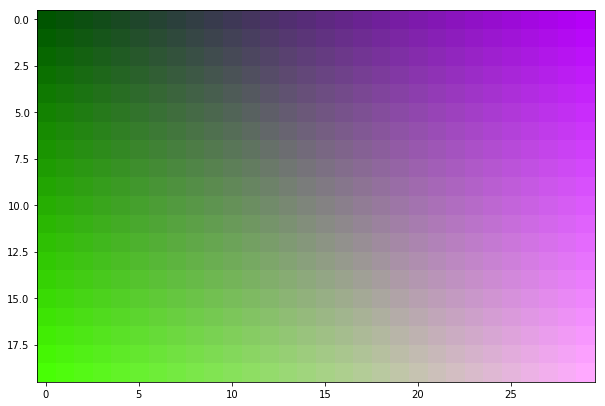

In [9]:
img = som.conv2img(sobj_makeK.K, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

### sksom

In [10]:
'''
argument init_K must be needed
'''
sobj = som.sksom((20, 30), init_K=sobj_makeK.K, it=50, verbose=1)
sobj

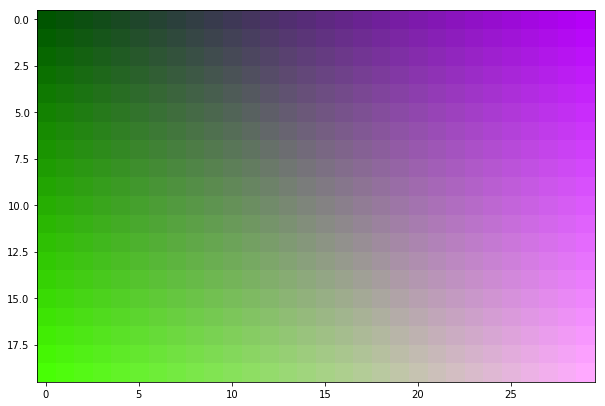

In [11]:
img = som.conv2img(sobj.landmarks_, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

## fit
r decreases linearly to one during training, if r=None

In [12]:
sobj.fit(X_sc)

 72%|███████▏  | 36/50 [00:00<00:00, 176.56it/s]

r: 20.0 gamma: 0.00125 mean distance: 0.19147011857295004
r: 19.612244897959183 gamma: 0.0012999162986006816 mean distance: 0.8217906560363452
r: 19.224489795918366 gamma: 0.0013528833714236774 mean distance: 1.39110468388685
r: 18.836734693877553 gamma: 0.0014091549882678015 mean distance: 1.6926678694392419
r: 18.448979591836736 gamma: 0.001469011864672253 mean distance: 1.8082477717646714
r: 18.06122448979592 gamma: 0.001532765169651122 mean distance: 1.8332831142564516
r: 17.6734693877551 gamma: 0.0016007605779539066 mean distance: 1.8174937833815132
r: 17.285714285714285 gamma: 0.0016733829656444233 mean distance: 1.7828718762046218
r: 16.89795918367347 gamma: 0.0017510618684216663 mean distance: 1.7379308122880495
r: 16.510204081632654 gamma: 0.0018342778476380518 mean distance: 1.6882415853357062
r: 16.122448979591837 gamma: 0.001923569940714629 mean distance: 1.635130901660018
r: 15.73469387755102 gamma: 0.002019544412313417 mean distance: 1.5810665269152167
r: 15.3469387755102

100%|██████████| 50/50 [00:00<00:00, 174.57it/s]

r: 6.040816326530614 gamma: 0.013701835281227167 mean distance: 0.5421399676624439
r: 5.653061224489797 gamma: 0.015645974794406284 mean distance: 0.5178503909912893
r: 5.26530612244898 gamma: 0.018035274322456583 mean distance: 0.4952245875472909
r: 4.8775510204081645 gamma: 0.021016788921762564 mean distance: 0.4740892806777172
r: 4.4897959183673475 gamma: 0.024803719008264457 mean distance: 0.4543222187544791
r: 4.1020408163265305 gamma: 0.029714611024479597 mean distance: 0.4359214368958243
r: 3.7142857142857153 gamma: 0.03624260355029584 mean distance: 0.4188052694608093
r: 3.3265306122448983 gamma: 0.045184237268997694 mean distance: 0.4028103879322014
r: 2.9387755102040813 gamma: 0.05789448302469137 mean distance: 0.38755560461860156
r: 2.5510204081632644 gamma: 0.07683200000000005 mean distance: 0.37304815420845977
r: 2.163265306122451 gamma: 0.1068440726237093 mean distance: 0.3591604184392153
r: 1.775510204081634 gamma: 0.15860747787026003 mean distance: 0.34571281930685854
r

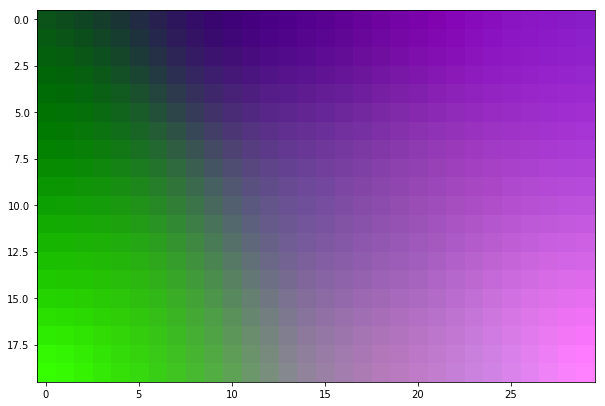

In [13]:
img = som.conv2img(sobj.landmarks_, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

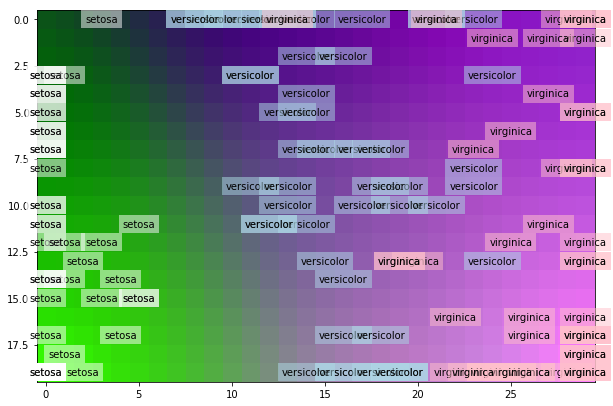

In [14]:
img = som.conv2img(sobj.landmarks_, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

for i, m in enumerate(sobj.predict(X_sc)):
    b, a = divmod(m, sobj.kshape[1])
    if iris.target_names[iris.target[i]] == 'versicolor':
        plt.text(a, b, 'versicolor', ha='center', va='center',
               bbox=dict(facecolor='lightblue', alpha=0.5, lw=0))
    elif iris.target_names[iris.target[i]] == 'virginica':
        plt.text(a, b, 'virginica', ha='center', va='center',
               bbox=dict(facecolor='pink', alpha=0.5, lw=0))
    else:
        plt.text(a, b, 'setosa', ha='center', va='center',
               bbox=dict(facecolor='white', alpha=0.5, lw=0))

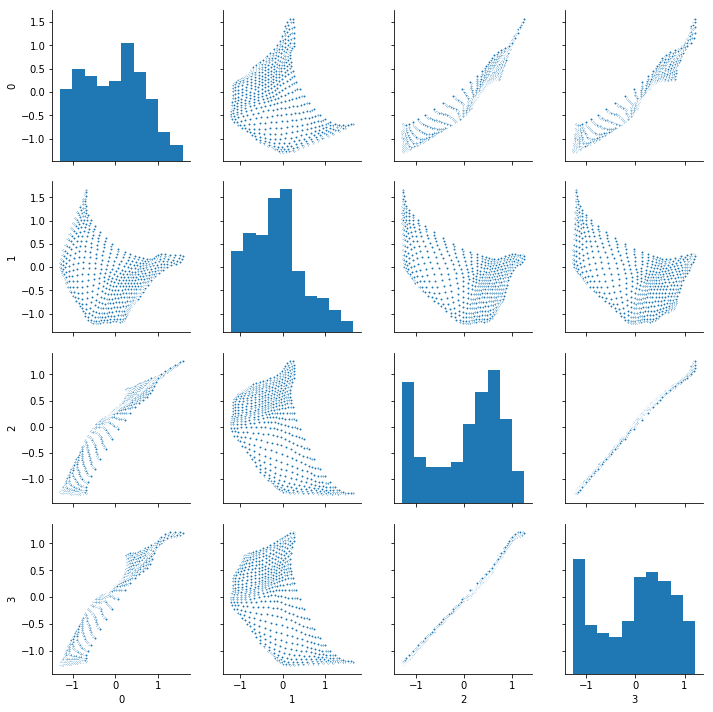

In [15]:
df = pd.DataFrame(sobj.landmarks_)
sns.pairplot(df, markers='.')

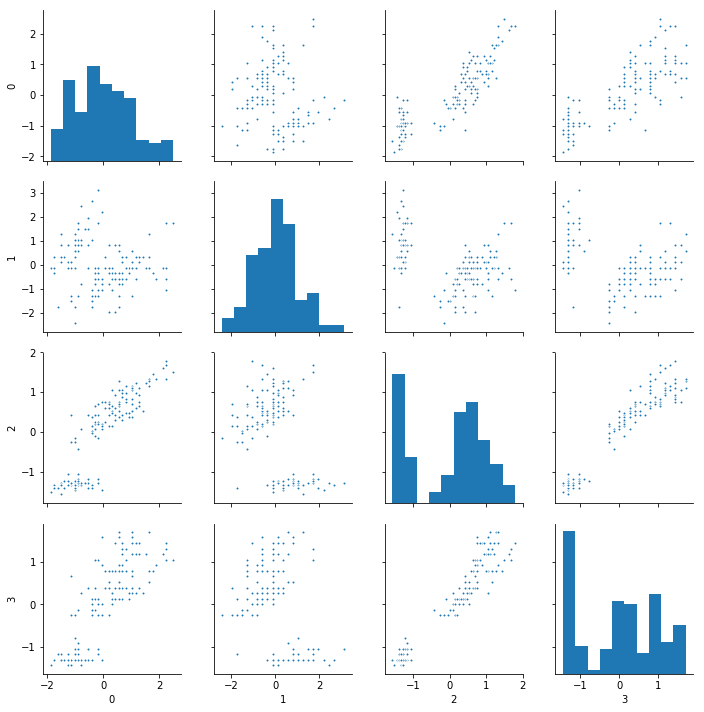

In [16]:
df = pd.DataFrame(X_sc)
sns.pairplot(df, markers='.')

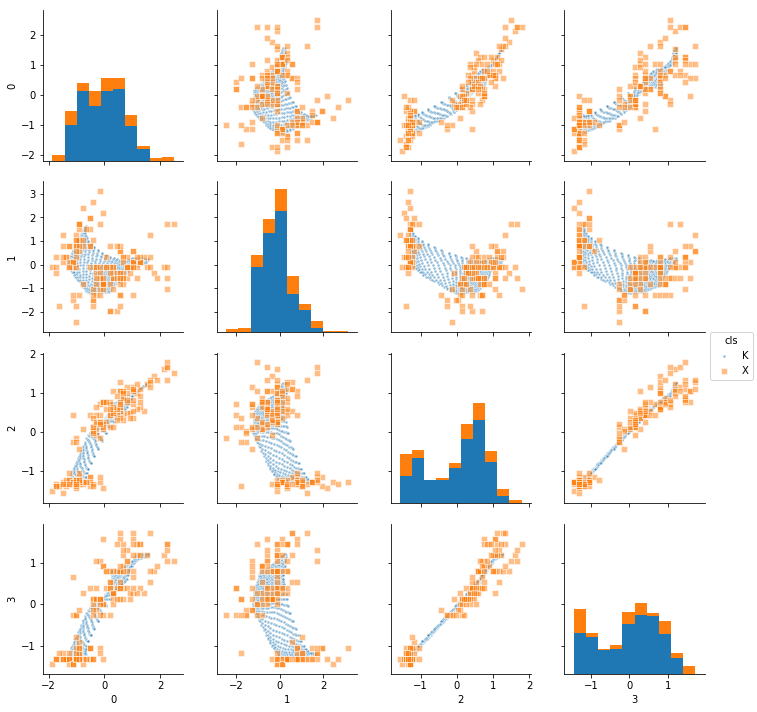

In [17]:
df1= pd.DataFrame(sobj.landmarks_)
df1['cls'] = 'K'
df1.head()
df2 = pd.DataFrame(X_sc)
df2['cls'] = 'X'
df2.head()
df = pd.concat([df1, df2], axis=0)
df.head()
df.shape
sns.pairplot(df, markers=['.', 's'], hue='cls', plot_kws={'alpha': 0.5})

### further train

In [18]:
'''
r does not change during training, if r set
'''
sobj.it = 500
sobj.r = 1.5
sobj.verbose = 0
sobj.fit(X_sc)

100%|██████████| 500/500 [00:02<00:00, 183.86it/s]

r: 1.5 gamma: 0.2222222222222222


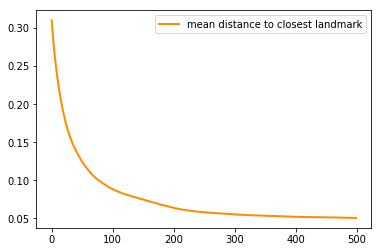

In [19]:
lw = 2
plt.plot(np.arange(len(sobj.meanDist)), sobj.meanDist, label="mean distance to closest landmark",
         color="darkorange", lw=lw)
plt.legend(loc="best")

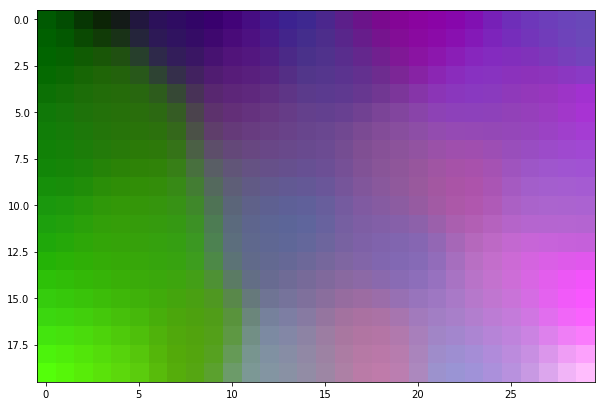

In [20]:
img = som.conv2img(sobj.landmarks_, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

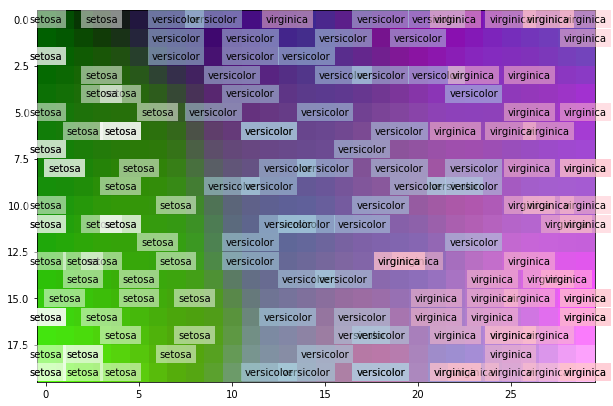

In [21]:
img = som.conv2img(sobj.landmarks_, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

for i, m in enumerate(sobj.predict(X_sc)):
    b, a = divmod(m, sobj.kshape[1])
    if iris.target_names[iris.target[i]] == 'versicolor':
        plt.text(a, b, 'versicolor', ha='center', va='center',
               bbox=dict(facecolor='lightblue', alpha=0.5, lw=0))
    elif iris.target_names[iris.target[i]] == 'virginica':
        plt.text(a, b, 'virginica', ha='center', va='center',
               bbox=dict(facecolor='pink', alpha=0.5, lw=0))
    else:
        plt.text(a, b, 'setosa', ha='center', va='center',
               bbox=dict(facecolor='white', alpha=0.5, lw=0))

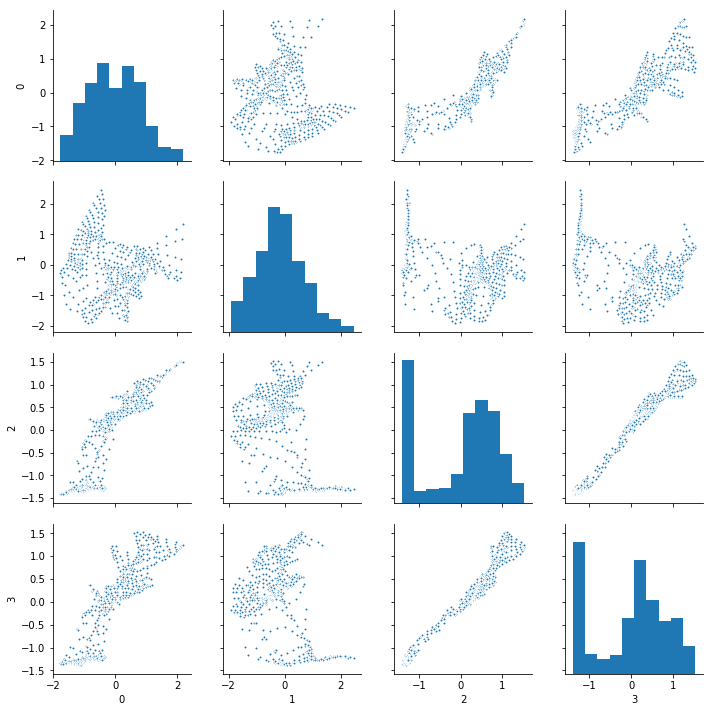

In [22]:
df = pd.DataFrame(sobj.landmarks_)
sns.pairplot(df, markers='.')

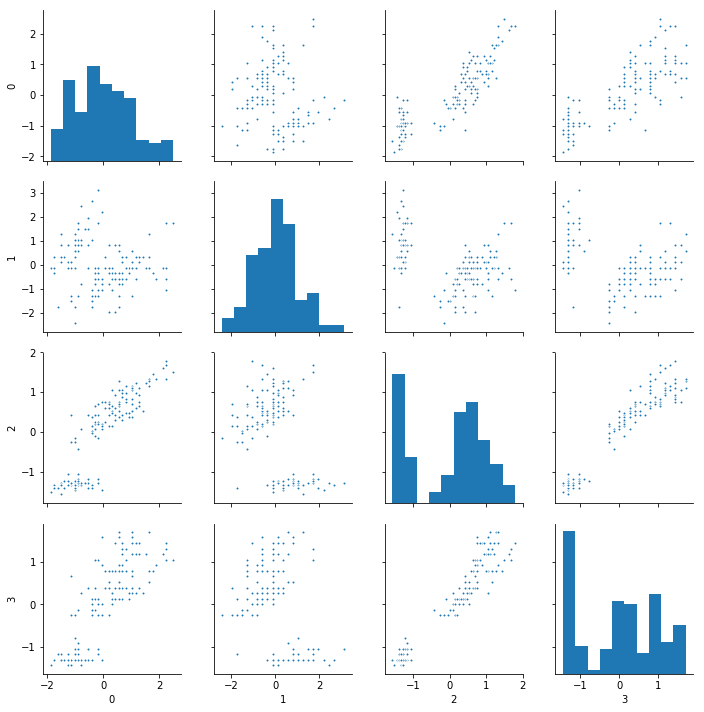

In [23]:
df = pd.DataFrame(X_sc)
sns.pairplot(df, markers='.')

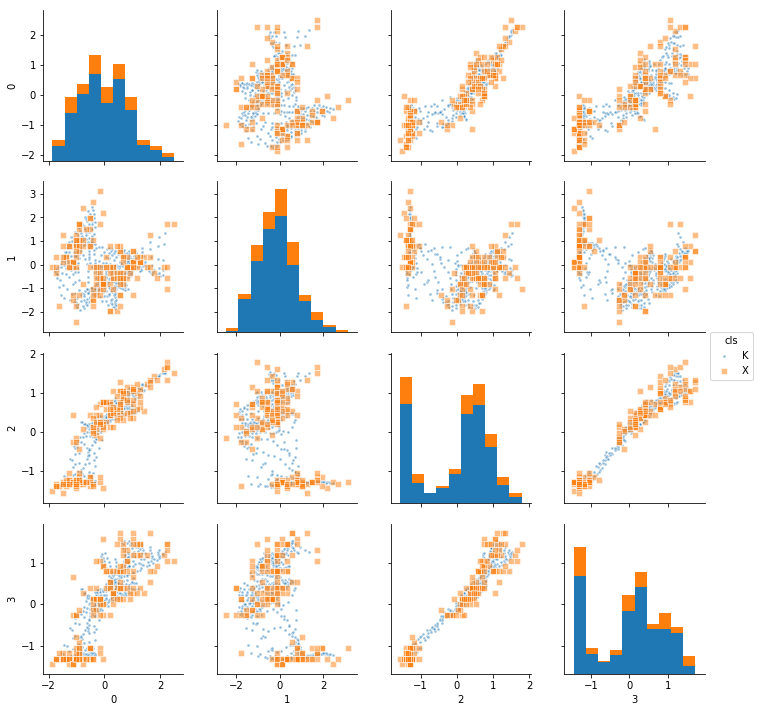

In [24]:
df1= pd.DataFrame(sobj.landmarks_)
df1['cls'] = 'K'
df1.head()
df2 = pd.DataFrame(X_sc)
df2['cls'] = 'X'
df2.head()
df = pd.concat([df1, df2], axis=0)
df.head()
df.shape
sns.pairplot(df, markers=['.', 's'], hue='cls', plot_kws={'alpha': 0.5})

## labels_

In [25]:
sobj.labels_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## predict
predict returns the nearest labels of input

In [26]:
sobj.predict(sobj.landmarks_)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [27]:
sobj.predict(X_sc)

array([393, 124, 241, 150, 422, 542, 300, 333,   0, 184, 514, 330, 123,
        60, 572, 570, 542, 425, 574, 480, 518, 451, 390, 307, 330, 156,
       366, 455, 334, 241, 182, 458, 540, 570, 184, 245, 547, 184,  60,
       334, 392,   3, 210, 397, 480,  93, 480, 210, 483, 274, 588, 555,
       588,  41, 263, 255, 584,  37, 292,  74,   9, 434,  18, 318, 280,
       527, 344, 192,  21, 131, 493, 227, 111, 199, 290, 497, 293, 383,
       347, 159,  71, 100, 192, 143, 343, 582, 528,  50, 371,  46, 106,
       436, 108,   7, 165, 401, 282, 259,  67, 253, 593,  27, 476, 266,
       329, 509,  13, 447, 179, 597, 501, 207, 358,  25,  59, 532, 326,
       599, 479,  22, 535,  29, 479, 176, 565, 537, 205, 410, 269, 416,
       448, 599, 269, 202, 113, 509, 592, 471, 409, 444, 504, 474,  27,
       535, 595, 359, 116, 327, 592, 409], dtype=int32)

## predict_proba
predict_proba returns probability array of shape = [n_query, n_landmarks]

In [28]:
'''
evaluate by gaussian kernel with gamma
'''
print(sobj.som.gamma)
sobj.predict_proba(X_sc)[:10,:5]

0.2222222222222222


array([[0.5518326 , 0.48272819, 0.36098944, 0.27009842, 0.23391168],
       [0.90859977, 0.88640138, 0.8040884 , 0.70462002, 0.64692033],
       [0.86998337, 0.80825323, 0.67165466, 0.54554772, 0.47770921],
       [0.93712592, 0.88884414, 0.76628101, 0.6421352 , 0.57233811],
       [0.4930014 , 0.42085672, 0.30124793, 0.21711867, 0.18409448],
       [0.21161255, 0.17063329, 0.11063305, 0.07425686, 0.06431002],
       [0.72639396, 0.64489791, 0.49441805, 0.37622527, 0.32310521],
       [0.65560393, 0.58549759, 0.45416127, 0.35021421, 0.30716131],
       [0.99944622, 0.98799527, 0.9159915 , 0.81274706, 0.73182975],
       [0.87185796, 0.83027771, 0.72145116, 0.60947075, 0.54825861]])

In [29]:
sobj.predict_proba(sobj.landmarks_)[:10,:5]

array([[1.        , 0.98893956, 0.91736527, 0.81351951, 0.72870083],
       [0.98893956, 1.        , 0.96518526, 0.88520602, 0.80721389],
       [0.91736527, 0.96518526, 1.        , 0.97411784, 0.91816666],
       [0.81351951, 0.88520602, 0.97411784, 1.        , 0.97560608],
       [0.72870083, 0.80721389, 0.91816666, 0.97560608, 1.        ],
       [0.55404698, 0.62385788, 0.73252302, 0.81113036, 0.91089721],
       [0.40638548, 0.46420264, 0.56016128, 0.64091919, 0.76724067],
       [0.35228995, 0.40662154, 0.50010703, 0.5830056 , 0.71371779],
       [0.30937414, 0.36166797, 0.4551625 , 0.54172893, 0.67459021],
       [0.26081027, 0.30835917, 0.39619417, 0.481172  , 0.61332204]])